## Death Predictions

The question is whether we are able to predict how many deaths will occur bases known factors. 

Assumptions:
* Countries' data are unique due to: 
 * Different case recording methodolodies.  eg: Germany test more while UK and Italy test only the most severe cases
 * Different social dynamics.  eg: Italy has a very family (larger family) centered life
 * Different age distribution.  The older are more likely to die due to the Covid-19
 * Different infection rates along different ages.  eg: Germany average age of the infected is apparently around 43, while Italy is around 68 (higher mortality rate)
 * Different relgious practices.  Italy is predomantly roman catholic.  Church goes dip their fingers in holi water when they go & leave church and make the sign of the cross that includes touching their forehead (infection vector).  Combine with the church going demographic
* Covid-19 cycle:
 * Day 7/8 admit to hospital (most likely tested at this point)
 * Day 17/18 Death occurs in worst cases

In [1]:
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 

In [2]:
from datetime import datetime
today_date=datetime.now()
#filename = "https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-"+today_date.strftime('%Y')+"-"+today_date.strftime('%m')+"-"+today_date.strftime('%d')+ ".xlsx"
filename ="https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-30.xlsx"
df=pd.read_excel(filename)

### Looked at total deaths as a % of total cases in different countries

In [3]:
cn_1=df.loc[df["geoId"]=='CN']
cn_C = cn_1.sort_values('dateRep')

cn_C['T_Cases'] = cn_C['cases'].cumsum()
cn_C['T_Deaths'] = cn_C['deaths'].cumsum()
cn_C['per_death']=cn_C['T_Deaths']/cn_C['T_Cases']

cn_C = cn_C.reset_index(drop=True)

In [4]:
it_P=df.loc[df["geoId"]=='IT']
it_P1 = it_P.sort_values('dateRep')

it_P1['T_cases'] = it_P1['cases'].cumsum()
it_P1['T_deaths'] = it_P1['deaths'].cumsum()
it_P1['per_death']=it_P1['T_deaths']/it_P1['T_cases']

it_P1 = it_P1.reset_index(drop=True)

In [5]:
uk_P=df.loc[df["geoId"]=='UK']
uk_P1 = uk_P.sort_values('dateRep')

uk_P1['T_Cases'] = uk_P1['cases'].cumsum()
uk_P1['T_Deaths'] = uk_P1['deaths'].cumsum()
uk_P1['per_death']=uk_P1['T_Deaths']/uk_P1['T_Cases']

uk_P1 = uk_P1.reset_index(drop=True)

In [6]:
de_P=df.loc[df["geoId"]=='DE']
de_P1 = de_P.sort_values('dateRep')

de_P1['T_Cases'] = de_P1['cases'].cumsum()
de_P1['T_Deaths'] = de_P1['deaths'].cumsum()
de_P1['per_death']=de_P1['T_Deaths']/de_P1['T_Cases']

de_P1 = de_P1.reset_index(drop=True)

In [7]:
us_P=df.loc[df["geoId"]=='US']
us_P1 = us_P.sort_values('dateRep')

us_P1['T_Cases'] = us_P1['cases'].cumsum()
us_P1['T_Deaths'] = us_P1['deaths'].cumsum()
us_P1['per_death']=us_P1['T_Deaths']/us_P1['T_Cases']

us_P1 = us_P1.reset_index(drop=True)

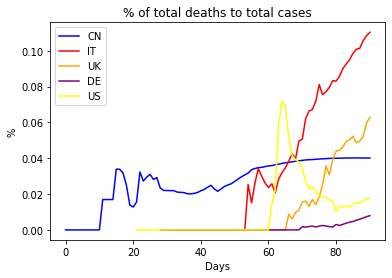

In [8]:
x1 = cn_C.index
y1 = cn_C['per_death']
x2 = it_P1.index
y2 = it_P1['per_death']
x3 = uk_P1.index
y3 = uk_P1['per_death']
x4 = de_P1.index
y4 = de_P1['per_death']
x5 = us_P1.index
y5 = us_P1['per_death']

plt.title('% of total deaths to total cases')
plt.xlabel('Days')
plt.ylabel('%')

plt.plot(x1,y1, color='blue', label='CN')
plt.plot(x2,y2, color='red', label='IT')
plt.plot(x3,y3, color='orange', label='UK')
plt.plot(x4,y4, color='purple', label='DE')
plt.plot(x5,y5, color='yellow', label='US')
plt.legend()

Shows that the Covid-19 mortality factors care different from country to country. 

### Look at correlation of deaths to past recorded cases

Assume case record occurs at day 7 of the virus cycle

In [9]:
uk_C=df.loc[df["geoId"]=='UK']
uk_C1 = uk_C.sort_values('dateRep')

uk_C1['Cases_8d']= uk_C1['cases'].shift(8)
uk_C1['Cases_9d']= uk_C1['cases'].shift(9)
uk_C1['Cases_10d']= uk_C1['cases'].shift(10)
uk_C1['Cases_11d']= uk_C1['cases'].shift(11)
uk_C1['Cases_12d']= uk_C1['cases'].shift(12)
uk_C1['Cases_13d']= uk_C1['cases'].shift(13)
uk_C1['Cases_14d']= uk_C1['cases'].shift(14)
uk_C1['Cases_15d']= uk_C1['cases'].shift(15)
uk_C2 = uk_C1.dropna()

#remove the cases without recognised cases.  there seem to be a gap at the beginning.  
indexNamesC = uk_C2[uk_C2['cases'] == 0 ].index
uk_C2.drop(indexNamesC, inplace=True)

uk_C2 = uk_C2.reset_index(drop=True)

/Users/michal/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
x3=uk_C2[['Cases_8d']]
x4=uk_C2[['Cases_9d']]
x5=uk_C2[['Cases_10d']]
x6=uk_C2[['Cases_11d']]
x7=uk_C2[['Cases_12d']]
x8=uk_C2[['Cases_13d']]
x9=uk_C2[['Cases_14d']]
x10=uk_C2[['Cases_15d']]
y=uk_C2['deaths']

lm.fit(x3, y)
print ("8d: ",lm.score(x3, y))
lm.fit(x4, y)
print ("9d: ",lm.score(x4, y))
lm.fit(x5, y)
print ("10d: ",lm.score(x5, y))
lm.fit(x6, y)
print ("11d: ",lm.score(x6, y))
lm.fit(x7, y)
print ("12d: ",lm.score(x7, y))
lm.fit(x8, y)
print ("13d: ",lm.score(x8, y))
lm.fit(x9, y)
print ("14d: ",lm.score(x9, y))
lm.fit(x10, y)
print ("15d: ",lm.score(x10, y))

8d:  0.8325845475771212
9d:  0.9065647742310491
10d:  0.8975012581045478
11d:  0.6654622809013729
12d:  0.6526480005578368
13d:  0.7370057105225619
14d:  0.8822167751035427
15d:  0.6317897262272447


### Look at a correlation with a range of days.  

0.984775121105581


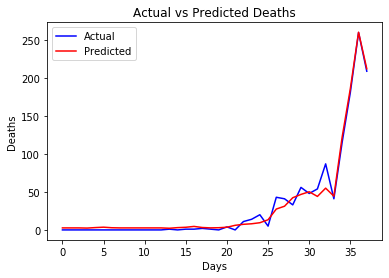

In [11]:
lm_reg = LinearRegression()
x_5c=uk_C2[['Cases_11d','Cases_12d','Cases_13d','Cases_14d','Cases_15d']]
lm_reg.fit(x_5c, y)
print (lm_reg.score(x_5c, y))

Death_hat_uk = lm_reg.predict(x_5c)

x_plot = uk_C2.index
y_plot = uk_C2['deaths']
#x = df_it_C.index
y_hat1 = Death_hat_uk

plt.title('Actual vs Predicted Deaths')
plt.xlabel('Days')
plt.ylabel('Deaths')

plt.plot(x_plot,y_plot, color='blue', label='Actual')
plt.plot(x_plot,y_hat1, color='red', label='Predicted')
plt.legend()


As can be seen there is quite a bit a variability in the fatalisies on a daily basis. 

## Look at at a rolling average

See is a rolling average can smooth the volatile cases numbers

In [12]:
uk_C2['Cases_3d_Ave1']= uk_C2[['Cases_9d','Cases_10d','Cases_11d']].mean(axis=1)
uk_C2['Cases_3d_Ave2']= uk_C2[['Cases_10d','Cases_10d','Cases_11d']].mean(axis=1)
uk_C2['Cases_3d_Ave3']= uk_C2[['Cases_11d','Cases_10d','Cases_11d']].mean(axis=1)
uk_C2['Cases_3d_Ave4']= uk_C2[['Cases_12d','Cases_13d','Cases_14d']].mean(axis=1)
uk_C2['Cases_3d_Ave5']= uk_C2[['Cases_13d','Cases_14d','Cases_15d']].mean(axis=1)

x_ave=uk_C2[['Cases_3d_Ave1']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
print ("3days 9-11: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_3d_Ave2']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
print ("3days 10-12: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_3d_Ave3']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
print ("3days 11-13: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_3d_Ave4']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
print ("3days 12-14: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_3d_Ave5']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
print ("3days 13-15: ", lm.score(x_ave, y))

3days 9-11:  0.9170673081899832
3days 10-12:  0.8748928521148261
3days 11-13:  0.7988032029517094
3days 12-14:  0.9329425290531876
3days 13-15:  0.9585685862821482


In [13]:
uk_C2['Cases_4d_Ave1']= uk_C2[['Cases_9d','Cases_10d','Cases_11d','Cases_12d']].mean(axis=1)
uk_C2['Cases_4d_Ave2']= uk_C2[['Cases_10d','Cases_11d','Cases_12d','Cases_13d']].mean(axis=1)
uk_C2['Cases_4d_Ave3']= uk_C2[['Cases_11d','Cases_12d','Cases_13d','Cases_14d']].mean(axis=1)
uk_C2['Cases_4d_Ave4']= uk_C2[['Cases_12d','Cases_13d','Cases_14d','Cases_15d']].mean(axis=1)

x_ave=uk_C2[['Cases_4d_Ave1']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
Death_hat_uk_ave1 = lm.predict(x_ave)
print ("4days 9-12: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_4d_Ave2']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
Death_hat_uk_ave1 = lm.predict(x_ave)
print ("4days 10-13: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_4d_Ave3']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
Death_hat_uk_ave1 = lm.predict(x_ave)
print ("4days 11-14: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_4d_Ave4']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
Death_hat_uk_ave1 = lm.predict(x_ave)
print ("4days 12-15: ", lm.score(x_ave, y))

4days 9-12:  0.9091014778392289
4days 10-13:  0.8988681898837239
4days 11-14:  0.8919380444197783
4days 12-15:  0.9242964829685453


In [14]:
uk_C2['Cases_5d_Ave1']= uk_C2[['Cases_9d','Cases_10d','Cases_11d','Cases_12d','Cases_13d']].mean(axis=1)
uk_C2['Cases_5d_Ave2']= uk_C2[['Cases_10d','Cases_11d','Cases_12d','Cases_13d','Cases_14d']].mean(axis=1)
uk_C2['Cases_5d_Ave3']= uk_C2[['Cases_11d','Cases_12d','Cases_13d','Cases_14d','Cases_15d']].mean(axis=1)

x_ave=uk_C2[['Cases_5d_Ave1']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
Death_hat_uk_ave1 = lm.predict(x_ave)
print ("5days 9-13: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_5d_Ave2']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
Death_hat_uk_ave1 = lm.predict(x_ave)
print ("5days 10-14: ", lm.score(x_ave, y))

x_ave=uk_C2[['Cases_5d_Ave3']]
y=uk_C2['deaths']
lm.fit(x_ave, y)
Death_hat_uk_ave1 = lm.predict(x_ave)
print ("5days 11-15: ", lm.score(x_ave, y))

5days 9-13:  0.9247774154527099
5days 10-14:  0.9251533414507884
5days 11-15:  0.8798361930110553


In [15]:
x_ave=uk_C2[['Cases_3d_Ave1','Cases_3d_Ave2','Cases_3d_Ave3','Cases_3d_Ave4','Cases_3d_Ave5']]
y=uk_C2['deaths']
lm_3d = LinearRegression()
lm_3d.fit(x_ave, y)
Death_hat_uk_3dave = lm_3d.predict(x_ave)
print ("3day average: ", lm_3d.score(x_ave, y))

x_ave=uk_C2[['Cases_4d_Ave1','Cases_4d_Ave2','Cases_4d_Ave3','Cases_4d_Ave4']]
y=uk_C2['deaths']
lm_4d = LinearRegression()
lm_4d.fit(x_ave, y)
Death_hat_uk_4dave = lm_4d.predict(x_ave)
print ("4day average: ", lm_4d.score(x_ave, y))

x_ave=uk_C2[['Cases_5d_Ave1','Cases_5d_Ave2','Cases_5d_Ave3']]
y=uk_C2['deaths']
lm_5d = LinearRegression()
lm_5d.fit(x_ave, y)
Death_hat_uk_5dave = lm_5d.predict(x_ave)
print ("5day average: ", lm_5d.score(x_ave, y))


3day average:  0.9805760166249375
4day average:  0.9306350385188922
5day average:  0.9404383219527066


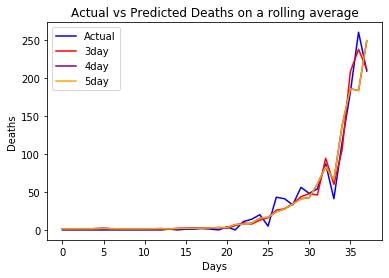

In [16]:
x_plot = uk_C2.index
y_plot = uk_C2['deaths']

y_hat1 = Death_hat_uk_3dave
y_hat2 = Death_hat_uk_4dave
y_hat3 = Death_hat_uk_4dave


plt.title('Actual vs Predicted Deaths on a rolling average')
plt.xlabel('Days')
plt.ylabel('Deaths')

plt.plot(x_plot,y_plot, color='blue', label='Actual')
plt.plot(x_plot,y_hat1, color='red', label='3day')
plt.plot(x_plot,y_hat2, color='purple', label='4day')
plt.plot(x_plot,y_hat3, color='orange', label='5day')

plt.legend()

## Look at predictions for the next 5 days

In [17]:
uk_F=df.loc[df["geoId"]=='UK']
uk_F1 = uk_F.sort_values('dateRep')
uk_F1 = uk_F1.reset_index(drop=True)

In [18]:
uk_F1['Cases_9d']= uk_F1['cases'].shift(4)
uk_F1['Cases_10d']= uk_F1['cases'].shift(5)
uk_F1['Cases_11d']= uk_F1['cases'].shift(6)
uk_F1['Cases_12d']= uk_F1['cases'].shift(7)
uk_F1['Cases_13d']= uk_F1['cases'].shift(8)
uk_F1['Cases_14d']= uk_F1['cases'].shift(9)
uk_F1['Cases_15d']= uk_F1['cases'].shift(10)

uk_F1 = uk_F1.dropna()
uk_F2= uk_F1.drop(['dateRep', 'day', 'year', 'month', 'cases','countriesAndTerritories','geoId','countryterritoryCode','popData2018'], axis=1)


In [19]:
x_reg=uk_F2[['Cases_11d','Cases_12d','Cases_13d','Cases_14d','Cases_15d']]
uk_F2['D_Reg'] = lm_reg.predict(x_reg)

uk_F2['Cases_3d_Ave1']= uk_F2[['Cases_9d','Cases_10d','Cases_11d']].mean(axis=1)
uk_F2['Cases_3d_Ave2']= uk_F2[['Cases_10d','Cases_10d','Cases_11d']].mean(axis=1)
uk_F2['Cases_3d_Ave3']= uk_F2[['Cases_11d','Cases_10d','Cases_11d']].mean(axis=1)
uk_F2['Cases_3d_Ave4']= uk_F2[['Cases_12d','Cases_13d','Cases_14d']].mean(axis=1)
uk_F2['Cases_3d_Ave5']= uk_F2[['Cases_13d','Cases_14d','Cases_15d']].mean(axis=1)

x_ave=uk_F2[['Cases_3d_Ave1','Cases_3d_Ave2','Cases_3d_Ave3','Cases_3d_Ave4','Cases_3d_Ave5']]
y=uk_F2['deaths']
uk_F2['D_3dAve'] = lm_3d.predict(x_ave)
print ("3day average: ", lm_3d.score(x_ave, y))

uk_F2['Cases_4d_Ave1']= uk_F2[['Cases_9d','Cases_10d','Cases_11d','Cases_12d']].mean(axis=1)
uk_F2['Cases_4d_Ave2']= uk_F2[['Cases_10d','Cases_11d','Cases_12d','Cases_13d']].mean(axis=1)
uk_F2['Cases_4d_Ave3']= uk_F2[['Cases_11d','Cases_12d','Cases_13d','Cases_14d']].mean(axis=1)
uk_F2['Cases_4d_Ave4']= uk_F2[['Cases_12d','Cases_13d','Cases_14d','Cases_15d']].mean(axis=1)

x_ave=uk_F2[['Cases_4d_Ave1','Cases_4d_Ave2','Cases_4d_Ave3','Cases_4d_Ave4']]
y=uk_F2['deaths']
uk_F2['D_4dAve'] = lm_4d.predict(x_ave)
print ("4day average: ", lm_4d.score(x_ave, y))

uk_F2['Cases_5d_Ave1']= uk_F2[['Cases_9d','Cases_10d','Cases_11d','Cases_12d','Cases_13d']].mean(axis=1)
uk_F2['Cases_5d_Ave2']= uk_F2[['Cases_10d','Cases_11d','Cases_12d','Cases_13d','Cases_14d']].mean(axis=1)
uk_F2['Cases_5d_Ave3']= uk_F2[['Cases_11d','Cases_12d','Cases_13d','Cases_14d','Cases_15d']].mean(axis=1)

x_ave=uk_F2[['Cases_5d_Ave1','Cases_5d_Ave2','Cases_5d_Ave3']]
y=uk_F2['deaths']
uk_F2['D_5dAve'] = lm_5d.predict(x_ave)
print ("5day average: ", lm_5d.score(x_ave, y))


3day average:  -2.360443788410226
4day average:  -1.855566465138634
5day average:  -1.120788658367017


In [20]:
uk_F3 = pd.DataFrame()
uk_F3['D_Reg']=uk_F2['D_Reg'] 
uk_F3['D_3dAve']=uk_F2['D_3dAve']
uk_F3['D_4dAve']=uk_F2['D_4dAve']
uk_F3['D_5dAve']=uk_F2['D_5dAve']
uk_F3['D_Ave']= uk_F2[['D_Reg','D_3dAve','D_4dAve','D_5dAve']].mean(axis=1)

uk_F3['deaths']=uk_F2['deaths'].shift(-5)

In [21]:
uk_F3.tail(10)

,D_Reg,D_3dAve,D_4dAve,D_5dAve,D_Ave,deaths
81,44.399819,59.844401,65.792367,104.069724,68.526578,41.0
82,121.966205,105.038061,137.259676,108.675928,118.234968,115.0
83,186.065384,208.049088,185.669648,171.048494,187.708154,181.0
84,260.355963,237.482359,183.331610,222.539867,225.927450,260.0
85,212.237045,211.564284,248.867336,216.746982,222.353912,209.0
86,206.340375,256.215876,298.595787,306.213877,266.841478,NaN
87,356.970950,391.476491,340.000934,378.888207,366.834145,NaN
88,507.338461,414.793491,402.779937,332.232734,414.286156,NaN
89,635.479700,562.432152,564.709099,390.030954,538.162976,NaN
90,658.403331,643.991179,565.571494,501.170259,592.284066,NaN


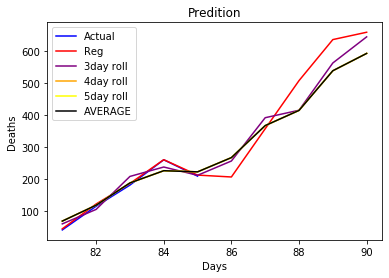

In [22]:
x_plot = uk_F3.tail(10).index
y_plot = uk_F3['deaths'].tail(10)

y_hat1 = uk_F3['D_Reg'].tail(10)
y_hat2 = uk_F3['D_3dAve'].tail(10)
y_hat3 = uk_F3['D_4dAve'].tail(10)
y_hat5 = uk_F3['D_5dAve'].tail(10)
y_hat3 = uk_F3['D_Ave'].tail(10)

plt.title('Predition')
plt.xlabel('Days')
plt.ylabel('Deaths')

plt.plot(x_plot,y_plot, color='blue', label='Actual')
plt.plot(x_plot,y_hat1, color='red', label='Reg')
plt.plot(x_plot,y_hat2, color='purple', label='3day roll')
plt.plot(x_plot,y_hat3, color='orange', label='4day roll')
plt.plot(x_plot,y_hat3, color='yellow', label='5day roll')
plt.plot(x_plot,y_hat3, color='black', label='AVERAGE')

plt.legend()

In [24]:
import datetime
datefortoday=datetime.date.today()
dateforyesterday=datefortoday-datetime.timedelta(days = 1)
savename= "death_prediction_"+str(dateforyesterday)+".csv"
print(savename)
uk_F3.tail(10).to_csv(savename)

death_prediction_2020-03-29.csv


## Quality on the Cases
The number of cases reported on daily basis have a high degree of variability.  
More details are needed on cases, to help with the predictions:
* Quality of the testing variables such as "Total Number of cases performed"
* Age of the confirmed cases.  eg: average age of those tested... 